# Project 2: Predicting sale prices with the Ames Iowa Housing dataset

## Problem Statement

Null Hype Realty Group have hit a slump in sales recently and seem to be losing traction in the market. They have surmised that their pricing model is outdated and have hired us to come up with a more competitive one. Our goal is to analyze the Ames Housing data set to and use regression modeling to create a model that more accurately predicts the current market value for potential clients. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#reading in files...considered using keep_default_na=False to preserve the actual NA values versus pandas taking it as a null, but it seems like we won't be working
#with a lot of the columns containing missing info and will impute values when appropriate
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

In [3]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [4]:
df_train.shape, df_test.shape

((2051, 81), (878, 80))

In [5]:
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
df_train.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

Text(0.5, 1, 'Data NaN values')

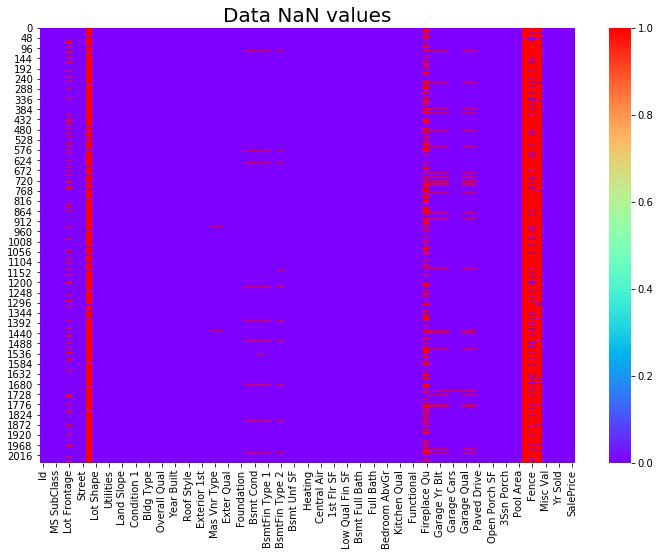

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isna()==True,cmap='rainbow')
plt.title('Data NaN values', fontsize=20)

Text(0.5, 1.0, 'Data NaN count')

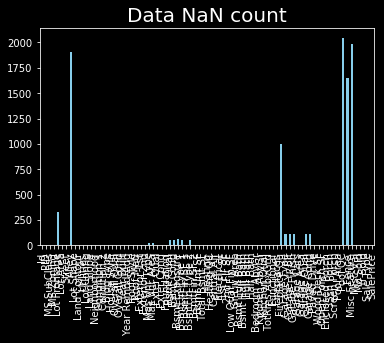

In [8]:
plt.style.use('dark_background')
df_train.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Data NaN count', fontsize=20)

In [9]:
df_train.corr()['SalePrice'].sort_values()

PID               -0.255052
Enclosed Porch    -0.135656
Kitchen AbvGr     -0.125444
Overall Cond      -0.097019
MS SubClass       -0.087335
Id                -0.051398
Bsmt Half Bath    -0.045328
Low Qual Fin SF   -0.041594
Yr Sold           -0.015203
Misc Val          -0.007375
BsmtFin SF 2       0.016255
Pool Area          0.023106
Mo Sold            0.032735
3Ssn Porch         0.048732
Screen Porch       0.134581
Bedroom AbvGr      0.137067
Bsmt Unf SF        0.190210
2nd Flr SF         0.248452
Half Bath          0.283001
Bsmt Full Bath     0.283662
Lot Area           0.296566
Wood Deck SF       0.326490
Open Porch SF      0.333476
Lot Frontage       0.341842
BsmtFin SF 1       0.423519
Fireplaces         0.471093
TotRms AbvGrd      0.504014
Mas Vnr Area       0.512230
Garage Yr Blt      0.533922
Full Bath          0.537969
Year Remod/Add     0.550370
Year Built         0.571849
1st Flr SF         0.618486
Total Bsmt SF      0.628925
Garage Cars        0.648220
Garage Area        0

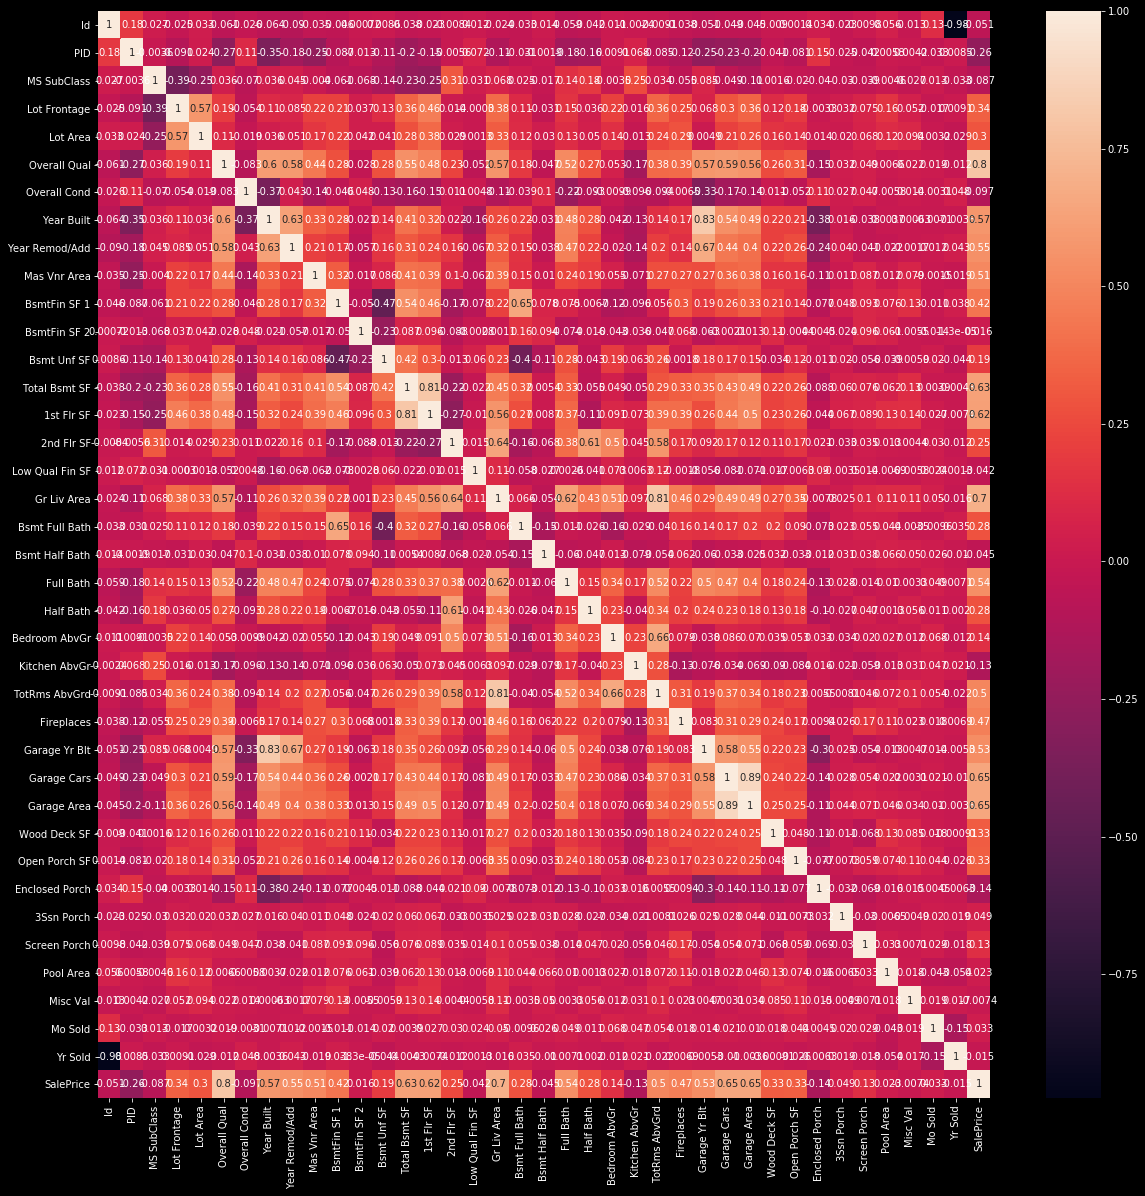

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

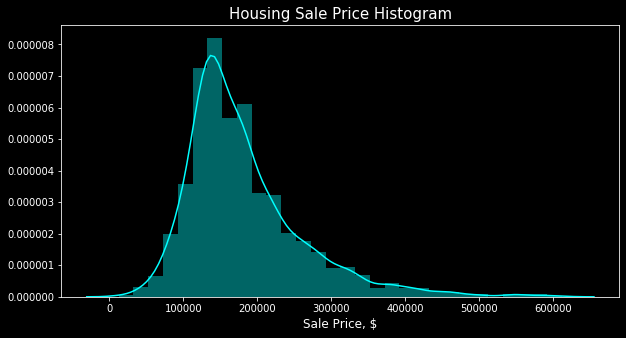

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(df_train.SalePrice, bins=30, kde=True, ax=ax, color='cyan')
plt.title('Housing Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price, $', fontsize=12);

In [13]:
df_train.SalePrice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

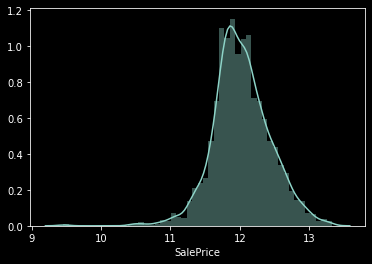

In [14]:
##log of sale price
sales_log = np.log(df_train['SalePrice'])
sns.distplot(sales_log)

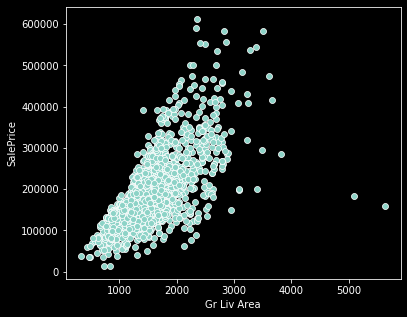

In [15]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df_train);

In [16]:
# dropping several columns from our datafame due to having similar values, weak correlation, 
## too much missing information, multicollinearity and to make EDA and feature selection easier
df_train.drop([ 'PID', 'Alley', 'Lot Shape', 'Utilities',
       'Lot Config', 'Land Slope', 'Roof Style', 'Roof Matl',
       'Mas Vnr Area','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
       'Heating', '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 
       'Bsmt Half Bath', 'Bedroom AbvGr', 'Garage Yr Blt',
       'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val'], axis=1, inplace=True)


# do the same for test dataset to keep it consistent 
df_test.drop([ 'PID', 'Alley', 'Lot Shape', 'Utilities',
       'Lot Config', 'Land Slope', 'Roof Style', 'Roof Matl',
       'Mas Vnr Area','BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 
       'Heating', '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 
       'Bsmt Half Bath', 'Bedroom AbvGr', 'Garage Yr Blt',
       'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val'], axis=1, inplace=True)

In [17]:
df_train.shape, df_test.shape

((2051, 52), (878, 51))

In [18]:
df_train.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Neighborhood,Condition 1,Condition 2,...,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,60,RL,NaN,13517,Pave,Lvl,Sawyer,RRAe,Norm,...,RFn,2.0,475.0,TA,TA,Y,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,Lvl,SawyerW,Norm,Norm,...,RFn,2.0,559.0,TA,TA,Y,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Lvl,NAmes,Norm,Norm,...,Unf,1.0,246.0,TA,TA,Y,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Lvl,Timber,Norm,Norm,...,Fin,2.0,400.0,TA,TA,Y,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,Lvl,SawyerW,Norm,Norm,...,Unf,2.0,484.0,TA,TA,N,3,2010,WD,138500


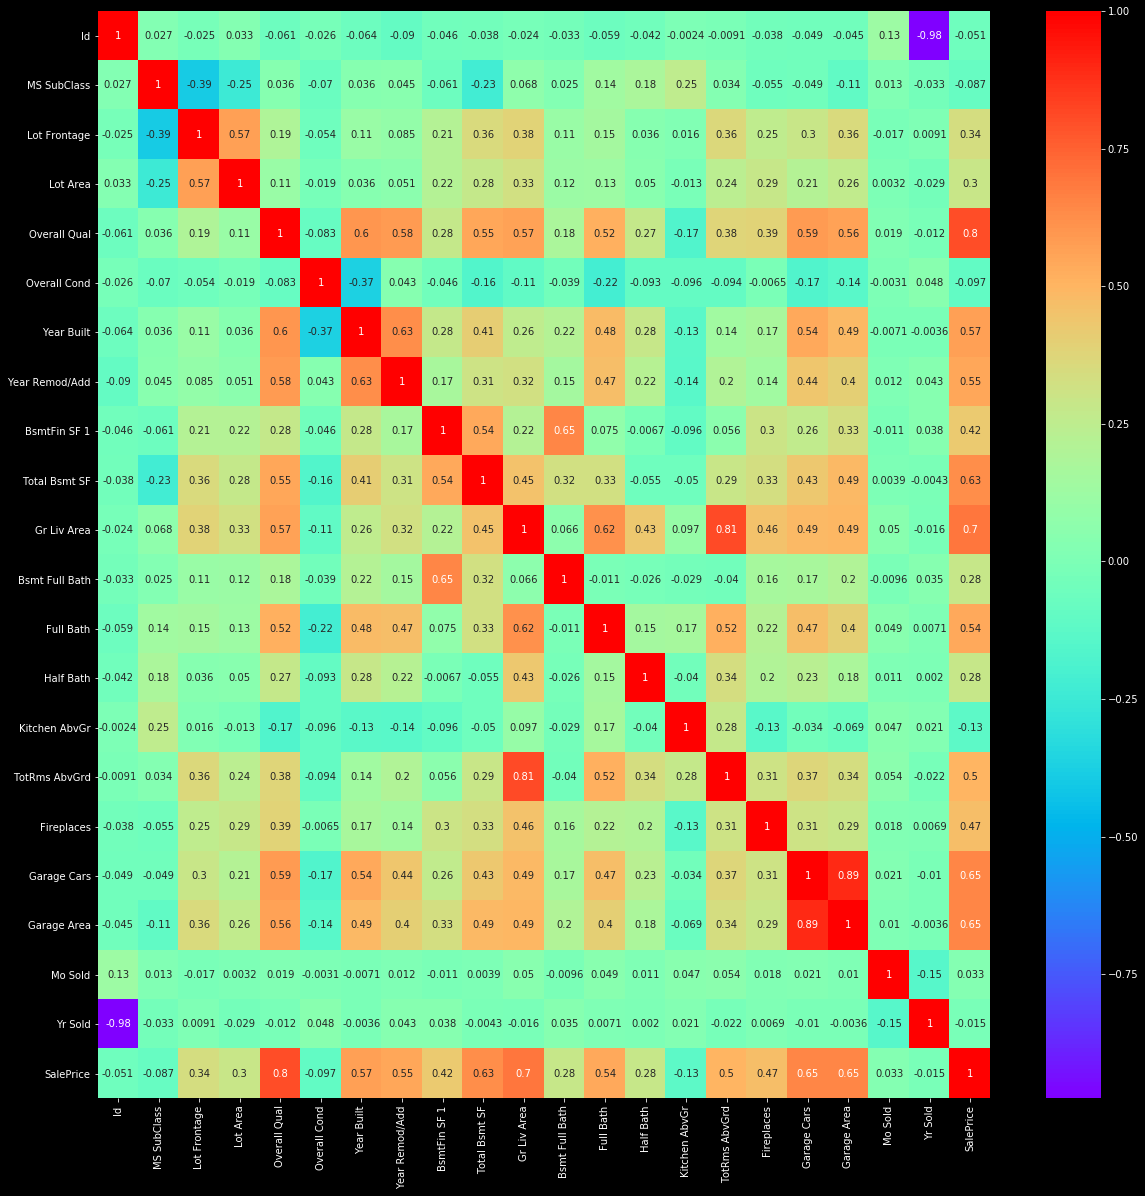

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True, cmap='rainbow')

In [20]:
# will continue cleaning using reduced files
df_train.to_csv('datasets/reduced_train.csv', index=False)

In [21]:
df_test.to_csv('datasets/reduced_test.csv', index=False)